<h1>

** Segmentación de clientes, mediante el algoritmo de k-means, según el comportamiento presentado por 18 variables obtenidas a partir del manejo de la tarjeta de crédito  ** 

</h1>

<hr>


## Importando librerías


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')

## Importando los datos

La base de datos que se va a usar es una hoja de datos separada por comas (CSV) con información de tarjetas de crédito recopilada en 6 meses sobre 18 variables de comportamiento diferentes de cada usuario.

* CUST_ID : Número de identificación del usuario 
* BALANCE : Balance disponible en la tarjeta para realizar compras
* BALANCE_FREQUENCY : Que tan frecuente se actualiza el balance, puntaje entre 0 y 1 (1 = frecuente, 0 = poco frecuente)
* PURCHASES : Cantidad de compras hechas
* ONEOFF_PURCHASES : Cantidad máxima de compra realizada de una sola vez
* INSTALLMENTS_PURCHASES : Importe de la compra realizada a plazos
* CASH_ADVANCE : Avances de efectivo hechos por el usuario
* PURCHASES_FREQUENCY : Que tan frecuente son hechas las compras, puntaje entre 0 y 1 (1 = frecuente, 0 = poco frecuente)
* ONEOFF_PURCHASES_FREQUENCY : Con qué frecuencia se realizan las compras de una sola vez(1 = frecuente, 0 = poco frecuente)
* PURCHASES_INSTALLMENTS_FREQUENCY : Con qué frecuencia se realizan las compras a plazos (1 = frecuente, 0 = poco frecuente)
* CASH_ADVANCE_FREQUENCY : Con que frecuencia se hacen avances de efectivo
* CASH_ADVANCE_TRX : Número de transacciones realizadas con "Avances"
* PURCHASES_TRX : Numero de transacciones de compra hechas
* CREDIT_LIMIT : Limite de la tarjeta de credito
* PAYMENTS : Cantidad de pagos hechos
* MINIMUM_PAYMENTS : Minima cantidad de pagos hechas
* PRC_FULL_PAYMENT : Porcentaje del pago total pagado
* TENURE : Tenencia del servicio de tarjeta de crédito 

In [95]:
#Importando datos desde la misma ruta donde esta el programa
dataframe = pd.read_csv(r"CC_GENERAL.csv")
dataframe.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

## Visualización de datos

Ahora se observa rapidamente como se comportan los datos:

In [97]:
dataframe.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

hay algunos datos vacíos en el conteo de datos, se observa cuantos son :

In [98]:
dataframe.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE                  0
dtype: int64

## Preprocesamiento de datos

Los datos faltantes generan problemas con muchos algoritmos de ML. Es por esto que existen distintas estrategias para lidiar con ellos: 

Ignorando la tupla, Rellenando manualmente, Sustituyendo con una constante global, Usando la media/desviación, Con el valor más probable, Mediante inferencia.

En el caso de las features que no son la variable objetivo una mejor solución para lidiar con los datos faltantes es remplazar estos datos por otros que sean manejables y no afecten la calidad de las predicciones. La estrategia más comun es utilizar la media de todos los ejemplos para la feature dada.

En este caso llenaremos los datos con la media.

In [99]:
print('Media de MINIMUM_PAYMENTS: ',dataframe['MINIMUM_PAYMENTS'].mean())
print('Media de CREDIT_LIMIT: ',dataframe['CREDIT_LIMIT'].mean())

Media de MINIMUM_PAYMENTS:  864.2065423050814
Media de CREDIT_LIMIT:  4494.449450364621


In [100]:
dataframe.loc[(dataframe['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=dataframe['MINIMUM_PAYMENTS'].mean()
dataframe.loc[(dataframe['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=dataframe['CREDIT_LIMIT'].mean()

Ahora se verifica que se hayan rellenado los datos correctamente

In [101]:
dataframe.isnull().sum().sort_values(ascending=False).head()

TENURE               0
PRC_FULL_PAYMENT     0
BALANCE              0
BALANCE_FREQUENCY    0
PURCHASES            0
dtype: int64

In [102]:
dataframe.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [103]:
dataframe.shape

(8950, 18)

Ahora se realizan categorías para las diferentes variables del dataset para lidiar con datos lejanos del resto sin sacarlos del analisis.    De esta forma se corrigen los datos que tengamos muy dispersos para poder trabajar también con ellos.


Las variables con valores de 0 a 1 ahora se escalan a valores de 1 a 10 y se guardan en una columna con el nombre anterior, se le adiciona la palabra "_RANGE"

In [104]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    dataframe[Range]=0
    dataframe.loc[((dataframe[c]>0)&(dataframe[c]<=0.1)),Range]=1
    dataframe.loc[((dataframe[c]>0.1)&(dataframe[c]<=0.2)),Range]=2
    dataframe.loc[((dataframe[c]>0.2)&(dataframe[c]<=0.3)),Range]=3
    dataframe.loc[((dataframe[c]>0.3)&(dataframe[c]<=0.4)),Range]=4
    dataframe.loc[((dataframe[c]>0.4)&(dataframe[c]<=0.5)),Range]=5
    dataframe.loc[((dataframe[c]>0.5)&(dataframe[c]<=0.6)),Range]=6
    dataframe.loc[((dataframe[c]>0.6)&(dataframe[c]<=0.7)),Range]=7
    dataframe.loc[((dataframe[c]>0.7)&(dataframe[c]<=0.8)),Range]=8
    dataframe.loc[((dataframe[c]>0.8)&(dataframe[c]<=0.9)),Range]=9
    dataframe.loc[((dataframe[c]>0.9)&(dataframe[c]<=1.0)),Range]=10

De la misma manera se generan rangos para PURCHASES_TRX y CASH_ADVANCE_TRX

In [105]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    dataframe[Range]=0
    dataframe.loc[((dataframe[c]>0)&(dataframe[c]<=5)),Range]=1
    dataframe.loc[((dataframe[c]>5)&(dataframe[c]<=10)),Range]=2
    dataframe.loc[((dataframe[c]>10)&(dataframe[c]<=15)),Range]=3
    dataframe.loc[((dataframe[c]>15)&(dataframe[c]<=20)),Range]=4
    dataframe.loc[((dataframe[c]>20)&(dataframe[c]<=30)),Range]=5
    dataframe.loc[((dataframe[c]>30)&(dataframe[c]<=50)),Range]=6
    dataframe.loc[((dataframe[c]>50)&(dataframe[c]<=100)),Range]=7
    dataframe.loc[((dataframe[c]>100)),Range]=8

In [106]:
dataframe.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   
5                    0.000000                          0.583333  ...   
6                    1.000000                          1.000000  ...   
7                    0.000000                          1.000000  ...   
8                    0.083333                          0.250000  ...   
9                    0.166667                          0.000000  ...   

   PRC_FULL_PAYMENT  TENURE  BALANCE_FREQUENCY_RANGE  \
0          0.000000      12                        9   
1          0.222222      12                       10   
2          0.000000      12                       10   
3          0.000000      12                        7   
4          0.000000      12                       10   
5          0.000000      12                       10   
6          1.000000      12                       10   
7          0.000000      12                       10   
8          0.000000      12                       10   
9          0.000000      12                        6   

   PURCHASES_FREQUENCY_RANGE  ONEOFF_PURCHASES_FREQUENCY_RANGE  \
0                          2                                 0   
1                          0                                 0   
2                         10                                10   
3                          1                                 1   
4                          1                                 1   
5                          7                                 0   
6                         10                                10   
7                         10                                 0   
8                          4                                 1   
9                          2                                 2   

   PURCHASES_INSTALLMENTS_FREQUENCY_RANGE  CASH_ADVANCE_FREQUENCY_RANGE  \
0                                       1                             0   
1                                       0                             3   
2                                       0                             0   
3                                       0    

Ahora, luego de tener los datos agrupados en categorías, se normalizan:

In [107]:
dataframe.drop(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT','PURCHASES_TRX', 
         'CASH_ADVANCE_TRX'], axis=1, inplace=True)
dataframe.head()

CUST_ID      BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  C10001    40.900749      95.40              0.00                    95.4   
1  C10002  3202.467416       0.00              0.00                     0.0   
2  C10003  2495.148862     773.17            773.17                     0.0   
3  C10004  1666.670542    1499.00           1499.00                     0.0   
4  C10005   817.714335      16.00             16.00                     0.0   

   CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  TENURE  \
0      0.000000        1000.0   201.802084        139.509787      12   
1   6442.945483        7000.0  4103.032597       1072.340217      12   
2      0.000000        7500.0   622.066742        627.284787      12   
3    205.788017        7500.0     0.000000        864.206542      12   
4      0.000000        1200.0   678.334763        244.791237      12   

   BALANCE_FREQUENCY_RANGE  PURCHASES_FREQUENCY_RANGE  \
0                        9                          2   
1                       10                          0   
2                       10                         10   
3                        7                          1   
4                       10                          1   

   ONEOFF_PURCHASES_FREQUENCY_RANGE  PURCHASES_INSTALLMENTS_FREQUENCY_RANGE  \
0                                 0                                       1   
1                                 0                                       0   
2                                10                                       0   
3                                 1                                       0   
4                                 1                                       0   

   CASH_ADVANCE_FREQUENCY_RANGE  PRC_FULL_PAYMENT_RANGE  PURCHASES_TRX_RANGE  \
0                             0                       0                    1   
1                             3                       3                    0   
2                             0                       0                    3   
3                             1                       0                    1   
4                             0                       0                    1   

   CASH_ADVANCE_TRX_RANGE  
0                       0  
1                       1  
2                       0  
3                       1  
4                       0

In [108]:
dataframe.shape

(8950, 18)

StandardScaler es una clase que implementa sklearn encargada de estandarizar características eliminando la media y escalando a la varianza de la unidad

In [109]:
dataframe.drop('CUST_ID',axis=1,inplace=True)

In [110]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(dataframe)
X.shape

(8950, 17)

Queda de 17 columnas porque ya se eliminó la variable alfanumérica de customer_ID

In [111]:
type(X)

numpy.ndarray

Ya que al escalar los datos X se convierte en un arreglo de numpy, se debe retornar de nuevo a dataframe para seguir trabajando con él.

In [112]:
dataframe.columns.tolist()

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'TENURE',
 'BALANCE_FREQUENCY_RANGE',
 'PURCHASES_FREQUENCY_RANGE',
 'ONEOFF_PURCHASES_FREQUENCY_RANGE',
 'PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
 'CASH_ADVANCE_FREQUENCY_RANGE',
 'PRC_FULL_PAYMENT_RANGE',
 'PURCHASES_TRX_RANGE',
 'CASH_ADVANCE_TRX_RANGE']

In [113]:
X = pd.DataFrame(
    data=X,
    columns=['BALANCE', 'PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
             'CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS',
             'TENURE','BALANCE_FREQUENCY_RANGE','PURCHASES_FREQUENCY_RANGE',
             'ONEOFF_PURCHASES_FREQUENCY_RANGE','PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
             'CASH_ADVANCE_FREQUENCY_RANGE','PRC_FULL_PAYMENT_RANGE',
             'PURCHASES_TRX_RANGE','CASH_ADVANCE_TRX_RANGE'])
X.head(10)

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.731989  -0.424900         -0.356934               -0.349079   
1  0.786961  -0.469552         -0.356934               -0.454576   
2  0.447135  -0.107668          0.108889               -0.454576   
3  0.049099   0.232058          0.546189               -0.454576   
4 -0.358775  -0.462063         -0.347294               -0.454576   
5  0.117878   0.154492         -0.356934                1.019822   
6 -0.450277   2.849408          3.500548                0.306664   
7  0.124520  -0.265388         -0.356934                0.027792   
8 -0.264026  -0.066330          0.041603               -0.233408   
9 -0.678504   0.130303          0.415209               -0.454576   

   CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS   TENURE  \
0     -0.466786     -0.960433 -0.528979     -3.109675e-01  0.36068   
1      2.605605      0.688639  0.818642      8.931021e-02  0.36068   
2     -0.466786      0.826062 -0.383805     -1.016632e-01  0.36068   
3     -0.368653      0.826062 -0.598688     -5.366135e-16  0.36068   
4     -0.466786     -0.905464 -0.364368     -2.657913e-01  0.36068   
5     -0.466786     -0.740557 -0.115060      6.621186e-01  0.36068   
6     -0.466786      2.475134  1.596313     -2.858411e-01  0.36068   
7     -0.466786     -0.603134 -0.364116     -1.425353e-01  0.36068   
8     -0.466786      0.688639 -0.360933     -2.369677e-01  0.36068   
9     -0.466786      1.788021 -0.196336     -3.277915e-01  0.36068   

   BALANCE_FREQUENCY_RANGE  PURCHASES_FREQUENCY_RANGE  \
0                 0.030404                  -0.771610   
1                 0.472155                  -1.264994   
2                 0.472155                   1.201929   
3                -0.853097                  -1.018302   
4                 0.472155                  -1.018302   
5                 0.472155                   0.461852   
6                 0.472155                   1.201929   
7                 0.472155                   1.201929   
8                 0.472155                  -0.278225   
9                -1.294848                  -0.771610   

   ONEOFF_PURCHASES_FREQUENCY_RANGE  PURCHASES_INSTALLMENTS_FREQUENCY_RANGE  \
0                         -0.708951                               -0.694434   
1                         -0.708951                               -0.939271   
2                          2.515681                               -0.939271   
3                         -0.386487                               -0.939271   
4                         -0.386487                               -0.939271   
5                         -0.708951                                0.529751   
6                          2.515681                                1.509098   
7                         -0.708951                                1.509098   
8                         -0.386487                               -0.204760   
9                         -0.064024                               -0.939271   

   CASH_ADVANCE_FREQUENCY_RANGE  PRC_FULL_PAYMENT_RANGE  PURCHASES_TRX_RANGE  \
0                     -0.708130               -0.541199            -0.646812   
1                      0.690317                0.452999            -1.099712   
2                     -0.708130               -0.541199             0.258988   
3                     -0.241981               -0.541199            -0.646812   
4                     -0.708130               -0.541199            -0.646812   
5                     -0.708130               -0.541199            -0.193912   
6                     -0.708130                2.772792             2.070589   
7                     -0.708130               -0.541199             0.258988   
8                     -0.708130               -0.541199            -0.646812   
9                     -0.708130               -0.541199            -0.646812   

   CASH_ADVANCE_TRX_RANGE  
0               -0.694622  
1                0.125978  
2               -0.69

## Selección de variables

Se observa ahora la distribución de los datos


* BALANCE : Balance disponible en la tarjeta para realizar compras
* BALANCE_FREQUENCY : Que tan frecuente se actualiza el balance, puntaje entre 0 y 1 (1 = frecuente, 0 = poco frecuente)
* PURCHASES : Cantidad de compras hechas
* ONEOFF_PURCHASES : Cantidad máxima de compra realizada de una sola vez
* INSTALLMENTS_PURCHASES : Importe de la compra realizada a plazos
* CASH_ADVANCE : Avances de efectivo hechos por el usuario
* PURCHASES_FREQUENCY : Que tan frecuente son hechas las compras, puntaje entre 0 y 1 (1 = frecuente, 0 = poco frecuente)
* ONEOFF_PURCHASES_FREQUENCY : Con qué frecuencia se realizan las compras de una sola vez(1 = frecuente, 0 = poco frecuente)
* PURCHASES_INSTALLMENTS_FREQUENCY : Con qué frecuencia se realizan las compras a plazos (1 = frecuente, 0 = poco frecuente)
* CASH_ADVANCE_FREQUENCY : Con que frecuencia se hacen avances de efectivo
* CASH_ADVANCE_TRX : Número de transacciones realizadas con "Avances"
* PURCHASES_TRX : Numero de transacciones de compra hechas
* CREDIT_LIMIT : Limite de la tarjeta de credito
* PAYMENTS : Cantidad de pagos hechos
* MINIMUM_PAYMENTS : Minima cantidad de pagos hechas
* PRC_FULL_PAYMENT : Porcentaje del pago total pagado
* TENURE : Tenencia del servicio de tarjeta de crédito 

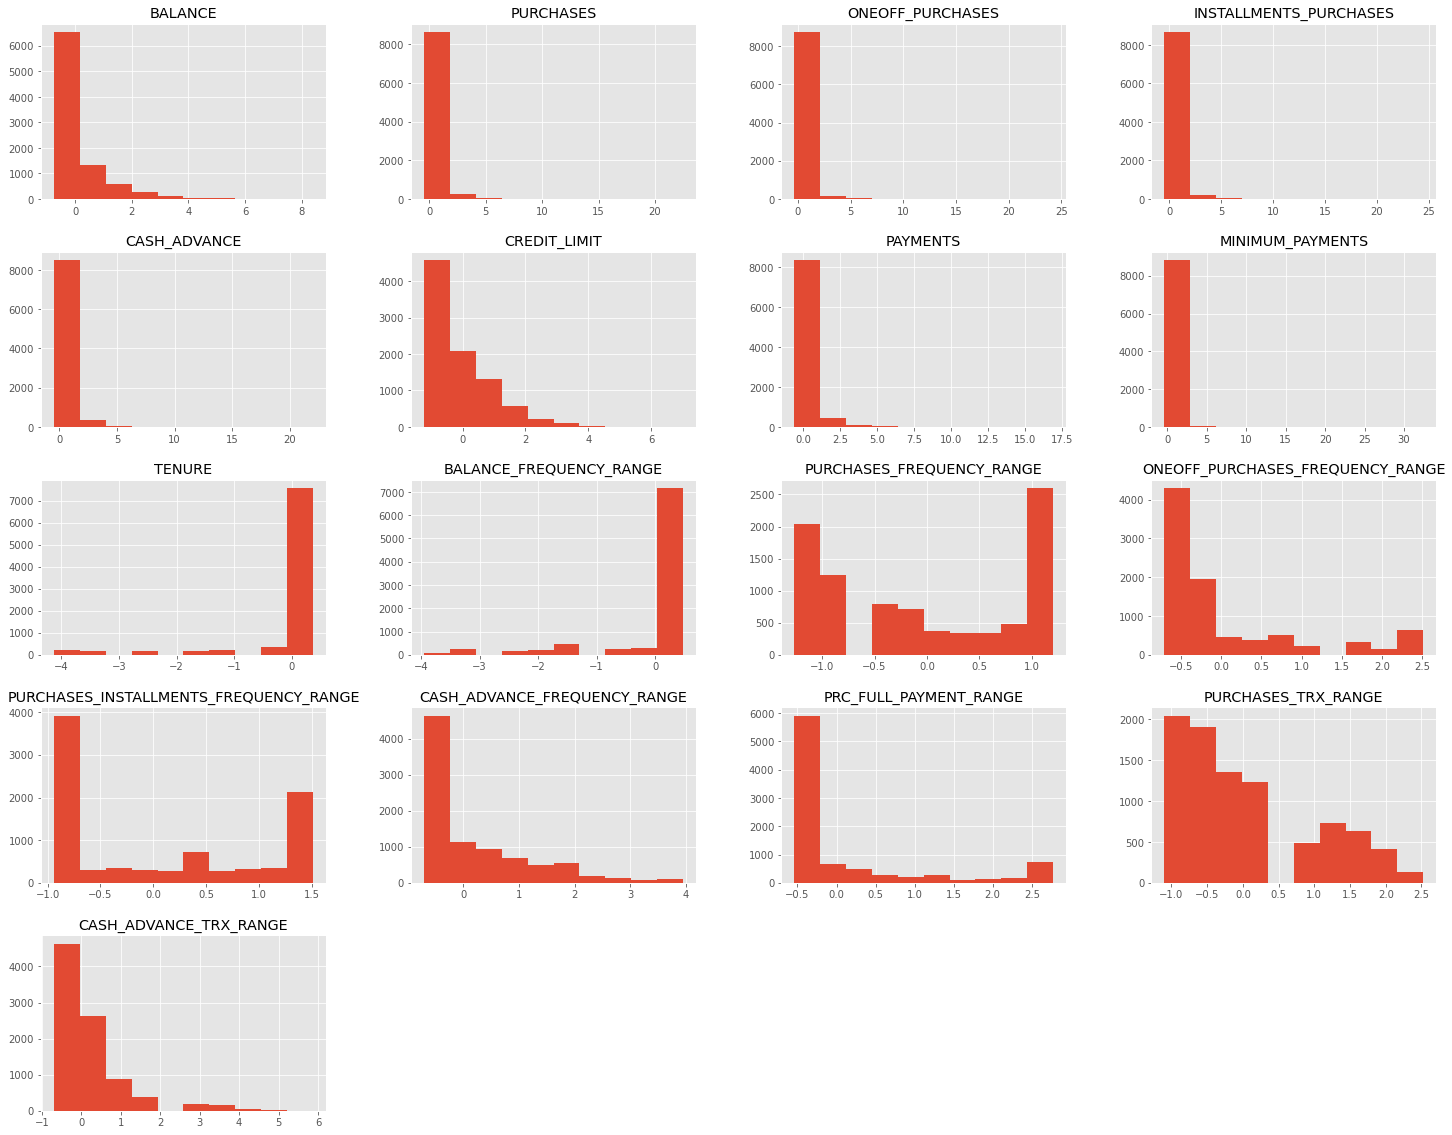

In [114]:
plt.rcParams['figure.figsize'] = (25, 20)

X.hist()
plt.show()

Analizar gráficamente la correlación entre cada par de variables, para conocer las que aportan mayor información.

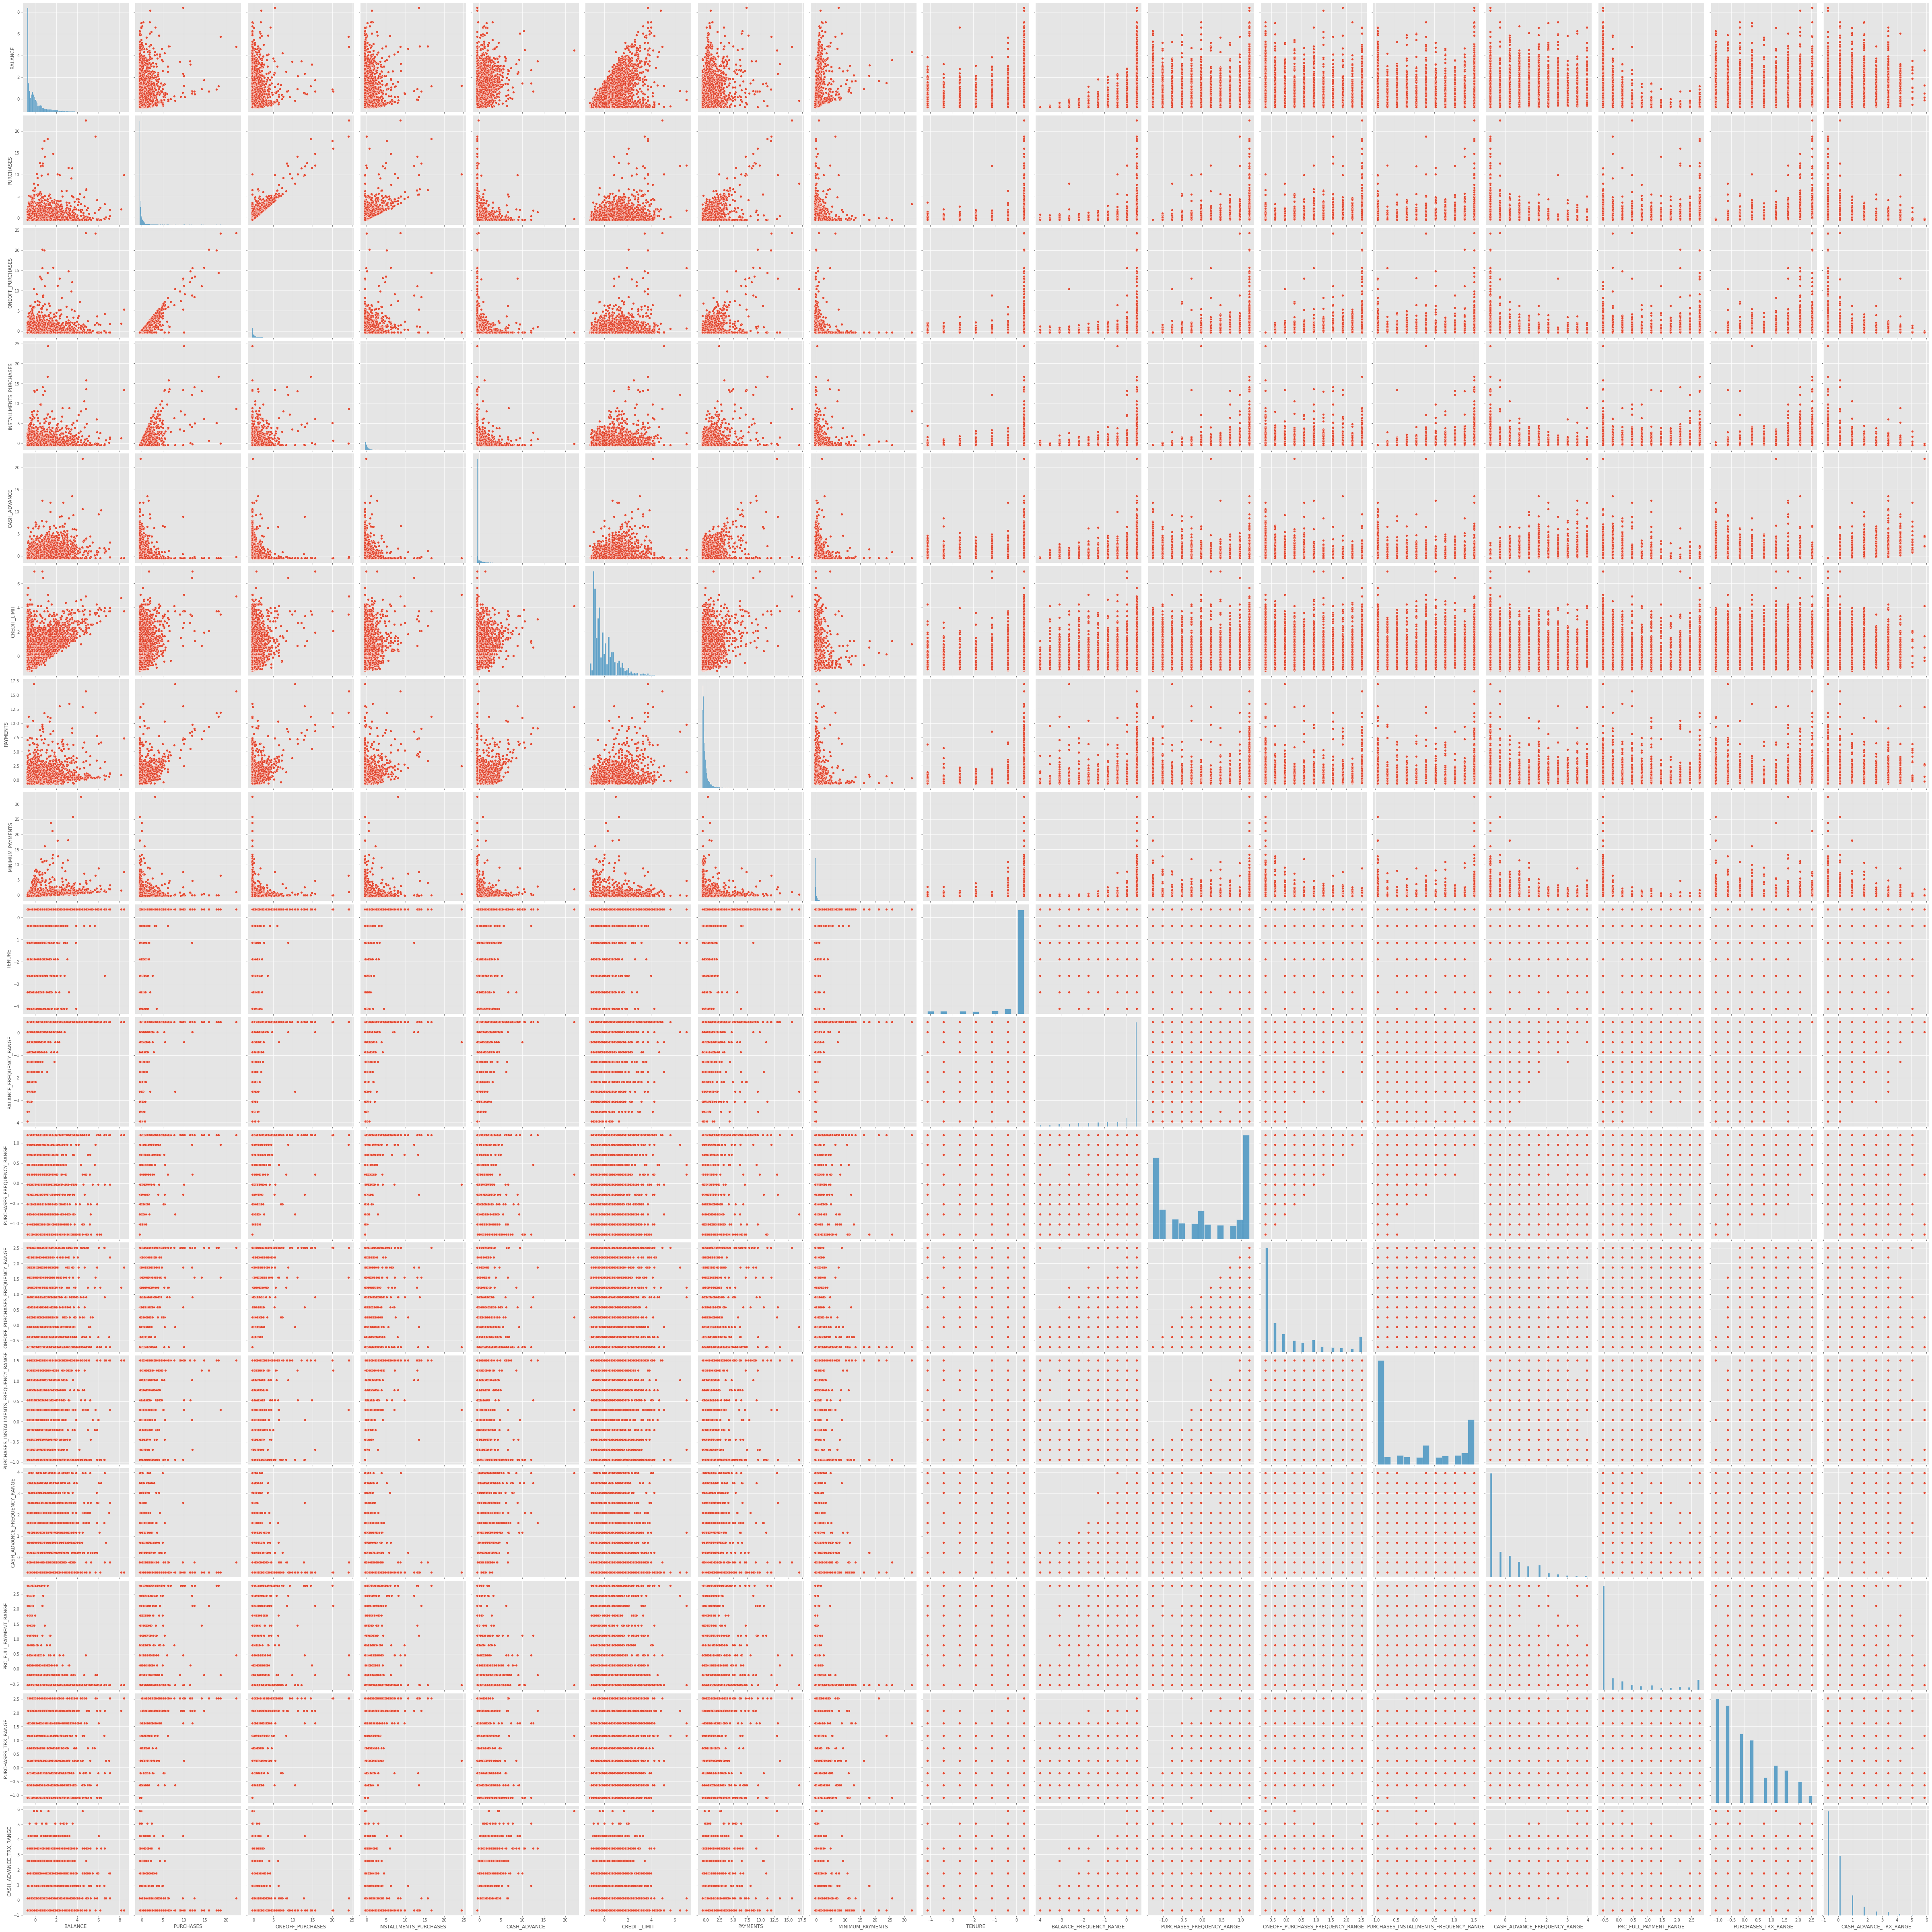

In [115]:


sb.pairplot(X.dropna(), height=4,vars=['BALANCE', 'PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
             'CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS',
             'TENURE','BALANCE_FREQUENCY_RANGE','PURCHASES_FREQUENCY_RANGE',
             'ONEOFF_PURCHASES_FREQUENCY_RANGE','PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
             'CASH_ADVANCE_FREQUENCY_RANGE','PRC_FULL_PAYMENT_RANGE',
             'PURCHASES_TRX_RANGE','CASH_ADVANCE_TRX_RANGE'], kind='scatter')

Se analiza entonces las variables:   "CREDIT_LIMIT","PURCHASES_TRX_RANGE","PURCHASES_FREQUENCY_RANGE"

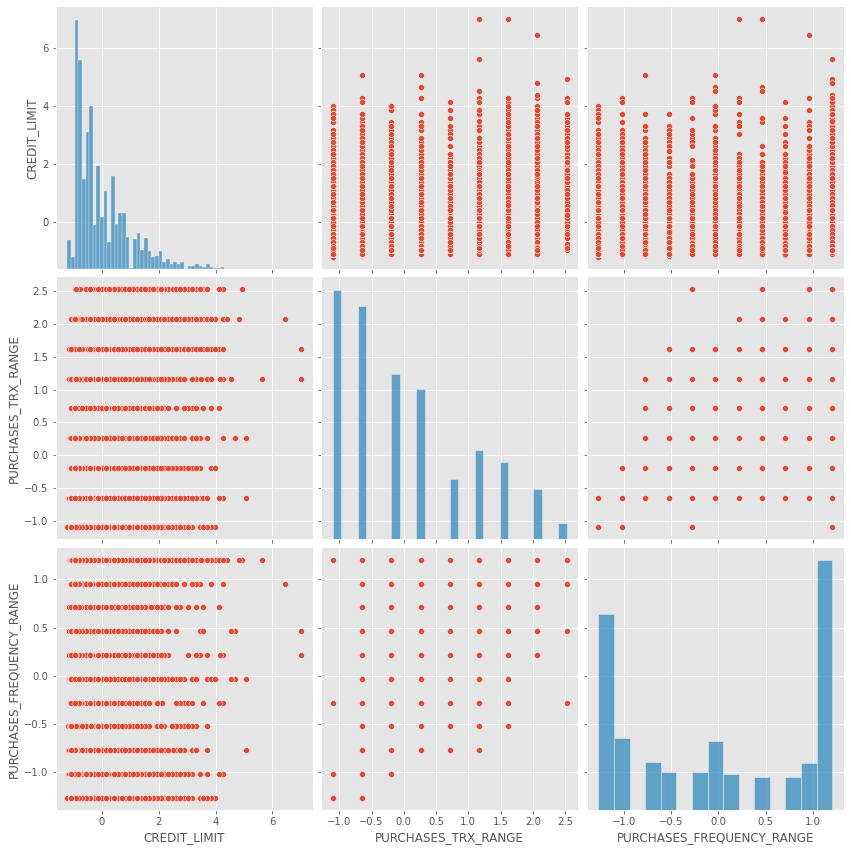

In [116]:
sb.pairplot(X.dropna(), height=4,vars=["CREDIT_LIMIT","PURCHASES_TRX_RANGE","PURCHASES_FREQUENCY_RANGE"],kind='scatter')

Dado a que los rangos son valores discretos pequeños, se evidencia una especie de cuadricula pero en general se observan los datos bien distribuidos en el espacio

## Definiendo la entrada

Usamos las variables definidas arriba para realizar el clustering con ellas, por lo que se cargan estas variables seleccionadas con todas sus entradas

In [117]:
X_arr = np.array(X[["CREDIT_LIMIT","PURCHASES_TRX_RANGE","PURCHASES_FREQUENCY_RANGE"]])
X_arr.shape

(8950, 3)

Ahora se grafican los usuarios de tarjeta de credito en base a estas 3 variables de comportamiento


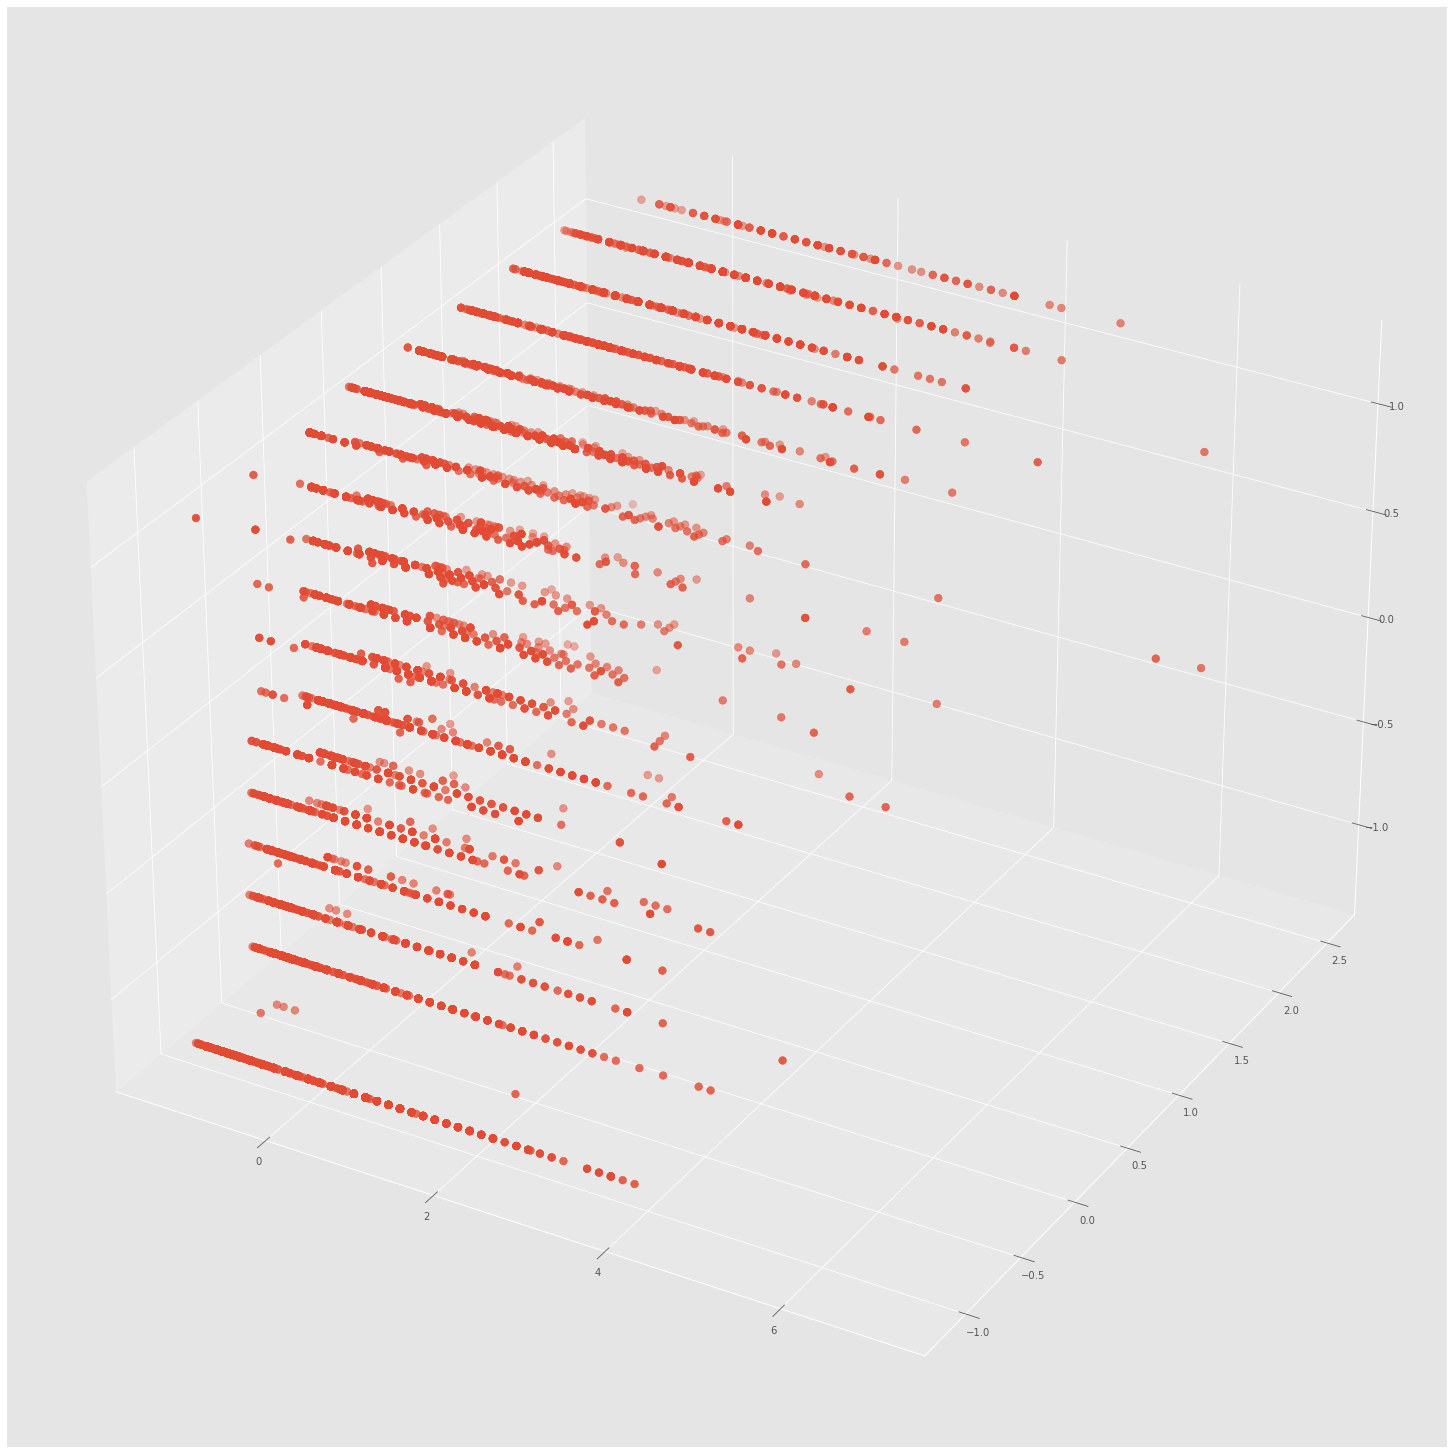

In [118]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_arr[:, 0], X_arr[:, 1], X_arr[:, 2],s=60)

## Obtener el valor K

Para obtener el valor de k o número de cluster se usa una curva de codo, la cual grafica la distancia de los puntos al centroide de su cluster contra la cantidad de clusters que hay, se debe elegir el "punto de codo" o lugar donde el cambio en la distancia ya no se considera significativo.

También es posible usar el metodo del estadistico de Gap, desarrollado por investigadores de la universidad de Stanford como una forma de estandarizar la manera de hallar clusters en datos que no se notan tan evidente en su distribución

Se usan 3 parametros que son:
- data: Arreglo con la informacion
- nrefs: Numero de muestras al dataset a crear
- maxClusters: Numero maximo de clusters para testear    

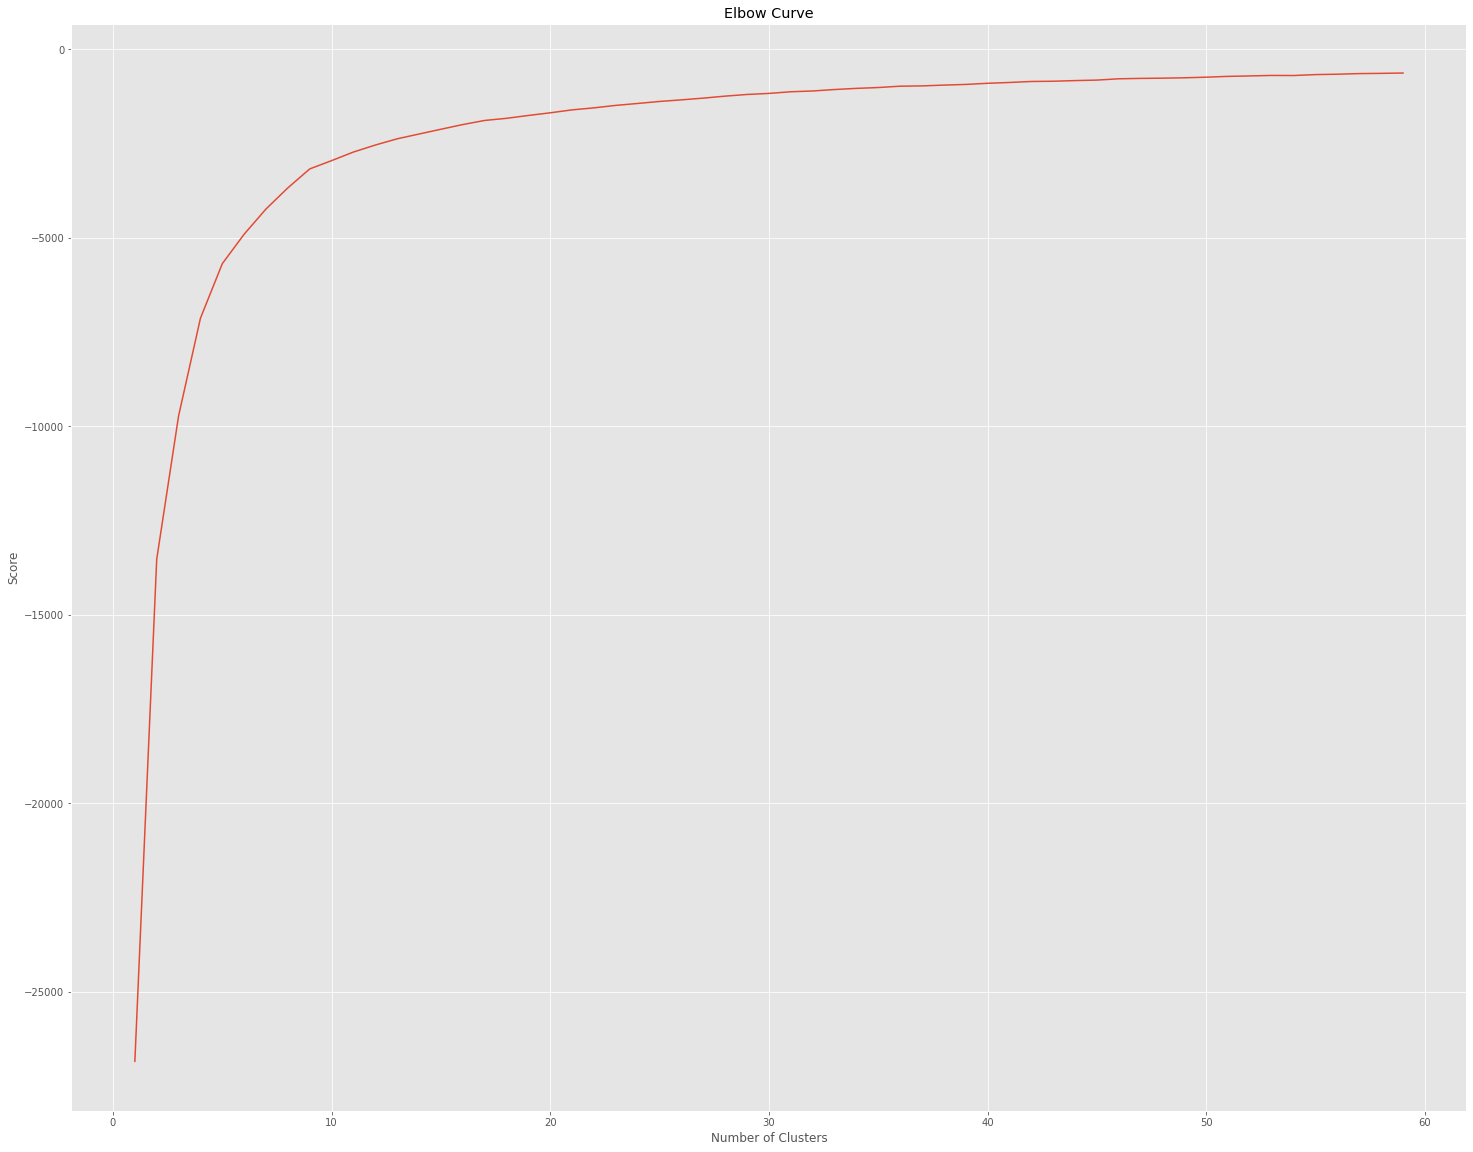

In [119]:
Nc = range(1, 60)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_arr).score(X_arr) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [120]:
data = X_arr
nrefs = 100               # num muestras de la base de datos
maxClusters = 10

gaps = np.zeros((len(range(1, maxClusters)),))
resultsdf = pd.DataFrame({'clusterCount': [], 'gap': []})
for gap_index, k in enumerate(range(1, maxClusters)):
    refDisps = np.zeros(nrefs) # Holder for reference dispersion results
    # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
    for i in range(nrefs):
        np.random.seed(0)
        randomReference = np.random.random_sample(size=data.shape) # Create new random reference set
        km = KMeans(k) # Fit to it
        km.fit(randomReference)

        refDisp = km.inertia_
        refDisps[i] = refDisp
        
    km = KMeans(k) # Fit cluster to original data and create dispersion
    km.fit(data)

    origDisp = km.inertia_

    gap = np.log(np.mean(refDisps)) - np.log(origDisp) # Calculate gap statistic
    gaps[gap_index] = gap # Assign this loop's gap statistic to gaps

    resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
# Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
k,resultsdf = (gaps.argmax() + 1, resultsdf)


print(k)

9


Cuando hay mucha dispersión en los datos, cómo en este caso, el estadístico de GAP va a intentar aumentar el número de clusters , por esta razón se debe analizar el gráfico de elbow para obtener una mejor aproximación al k óptimo.

## Ejecutando K-means

La gráfica de codo y el estadístico de gap arrojan como valor óptimo de clusters k = 9 , sin embargo, al hacer pruebas con k= 10, 8, 7 se nota que varios clusters se superponen, se infiere entonces que son demasiados clusters, luego se prueba con valores cercanos a 5 ,como k=3 pero son insuficientes clusters. A la final el valor cercano al k óptimo predicho por el estadísico de Gap es el valor de K=6.

In [143]:
n_clusters=6
kmeans = KMeans(n_clusters=n_clusters).fit(X_arr)
centroids = kmeans.cluster_centers_
print('Centroides: \n\n', centroids)

Centroides: 

 [[ 2.08087454  1.25063658  1.01451676]
 [ 1.20392293 -0.78118923 -0.89214064]
 [-0.56209774  0.34524186  1.03476762]
 [-0.35773822 -0.22708056 -0.03514586]
 [-0.58903341 -0.91213329 -1.10357597]
 [ 0.11344538  1.56944478  1.08573364]]


Ahora se grafican los clusters por colores y se marca con una estrella el centroide de cada uno

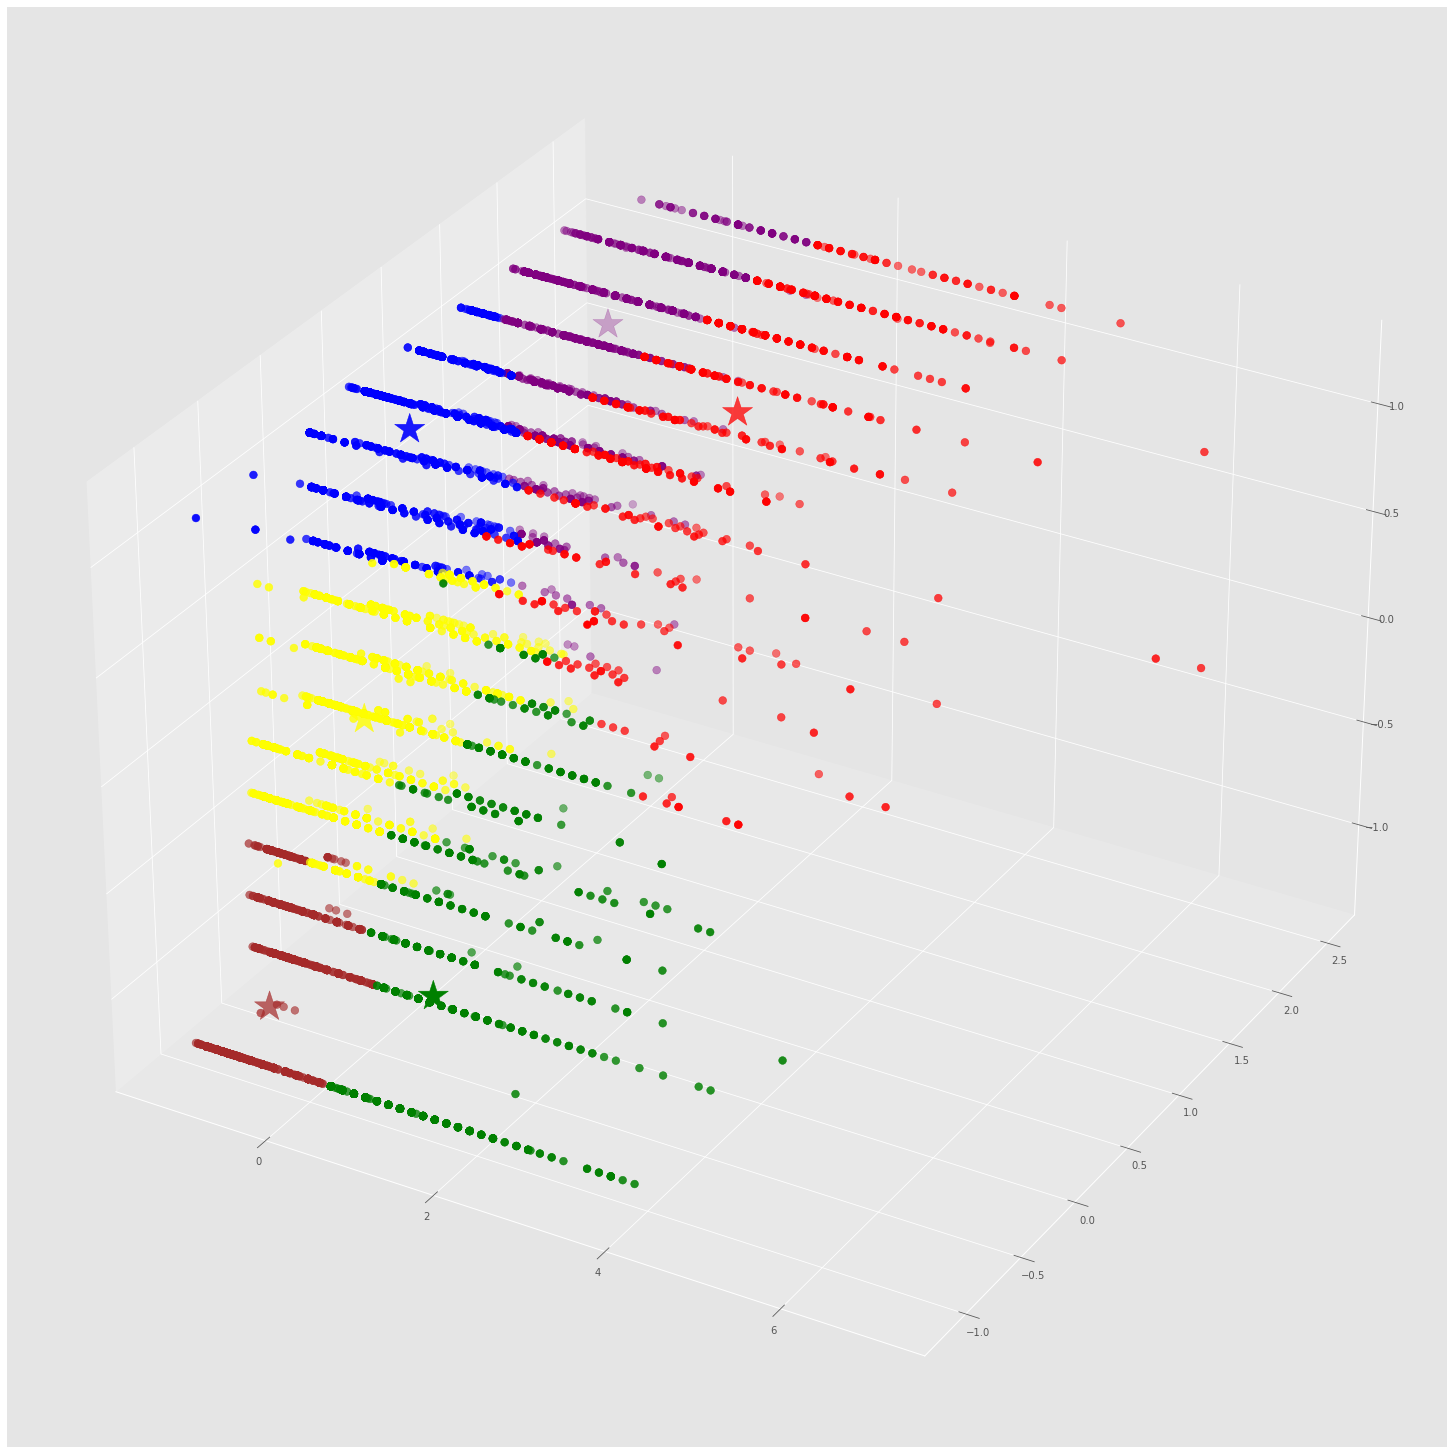

In [144]:
color = ['red','green','blue','yellow','brown','purple','black','orange','cyan', 'lime']
colores = color[:n_clusters]

# Predicción de los clusters
labels = kmeans.predict(X_arr)

# obteniendo los centroides de los clusters
C = kmeans.cluster_centers_


asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_arr[:, 0], X_arr[:, 1], X_arr[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

A continuación, se grafican las proyecciones para observar de mejor manera los cluster segun cada par de las 3 variables

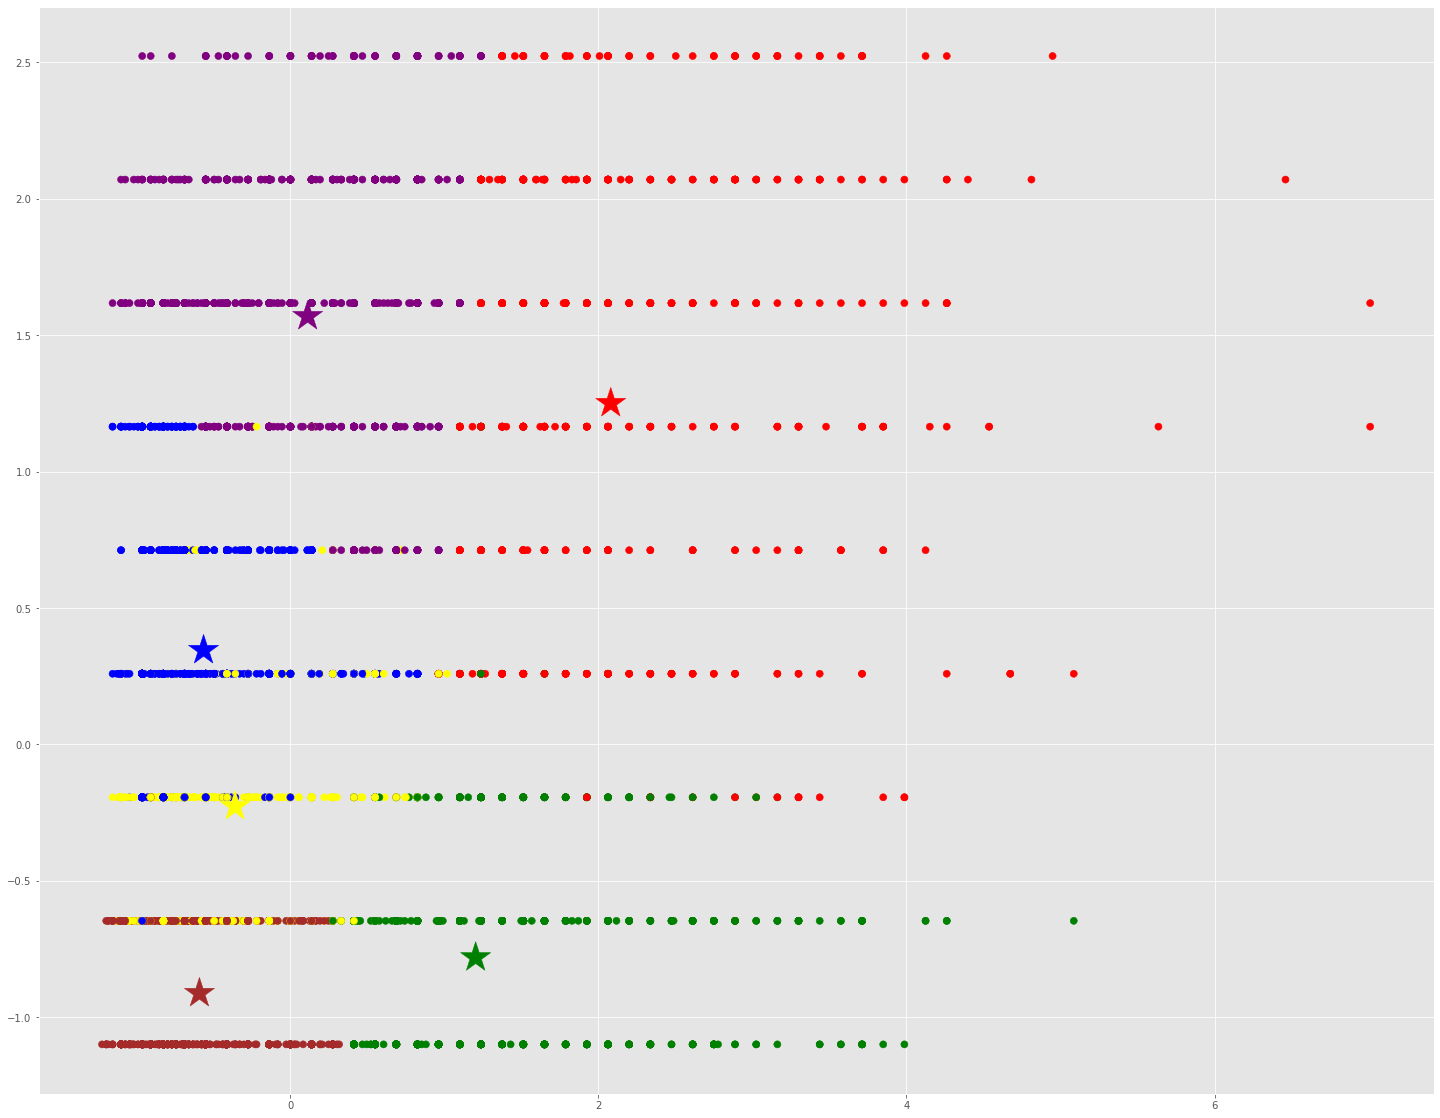

In [145]:
f1 = X['CREDIT_LIMIT'].values
f2 = X['PURCHASES_TRX_RANGE'].values
 
plt.scatter(f1, f2, c=asignar, s=50)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

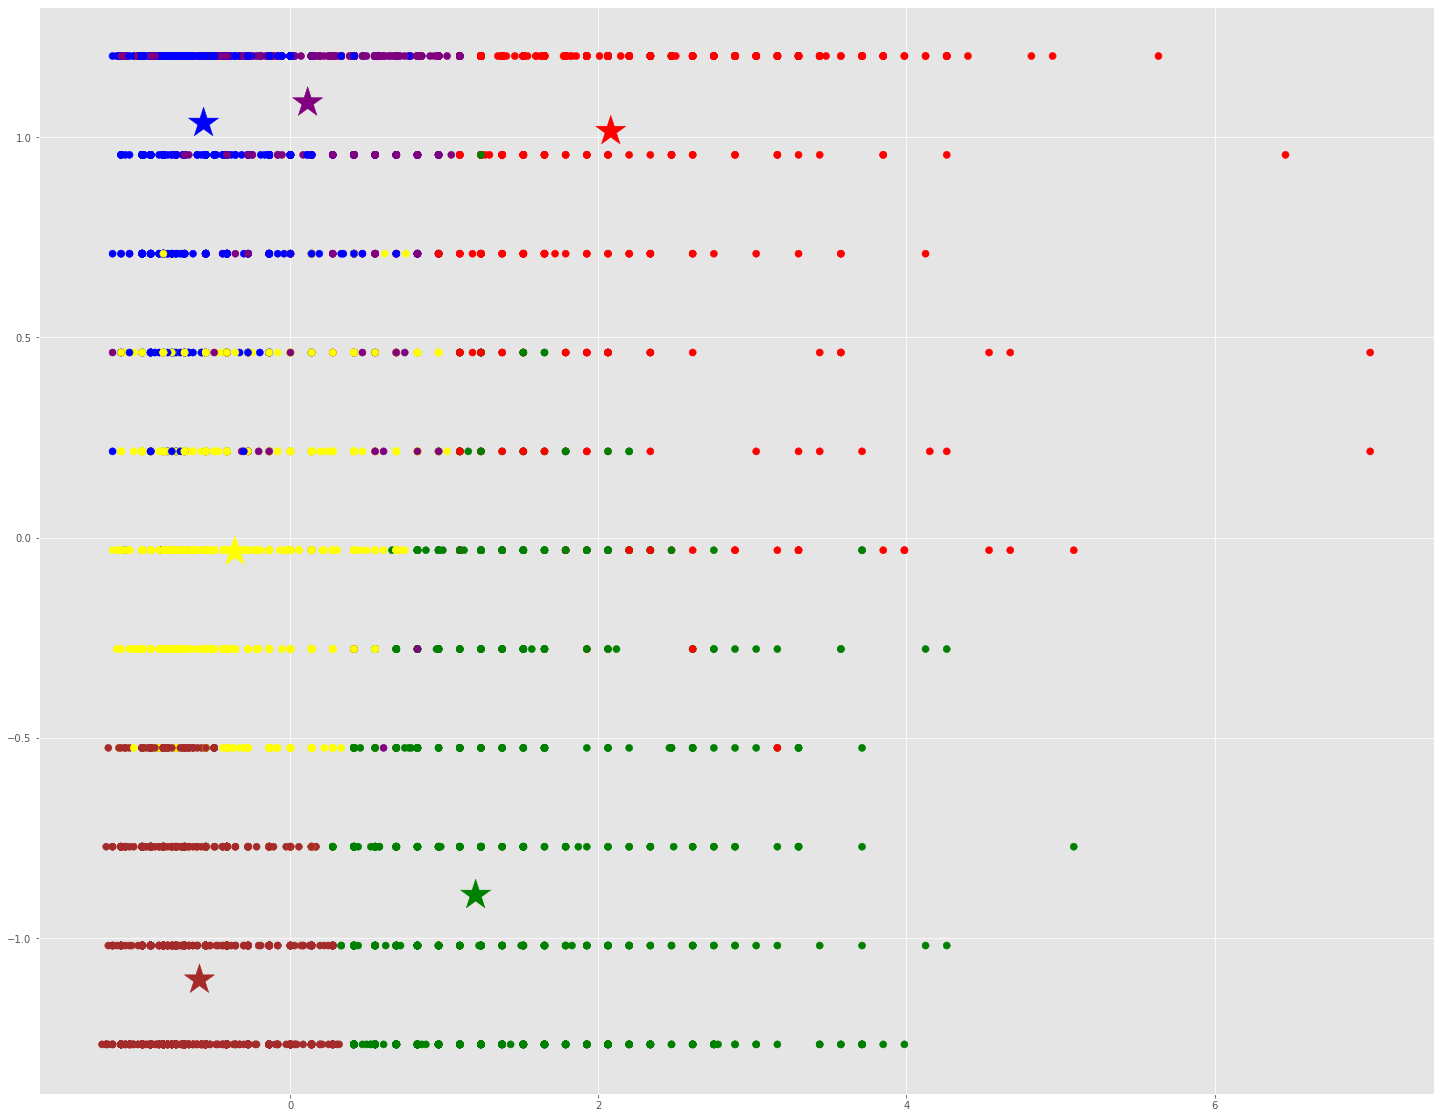

In [146]:
f1 = X['CREDIT_LIMIT'].values
f2 = X['PURCHASES_FREQUENCY_RANGE'].values
 
plt.scatter(f1, f2, c=asignar, s=50)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

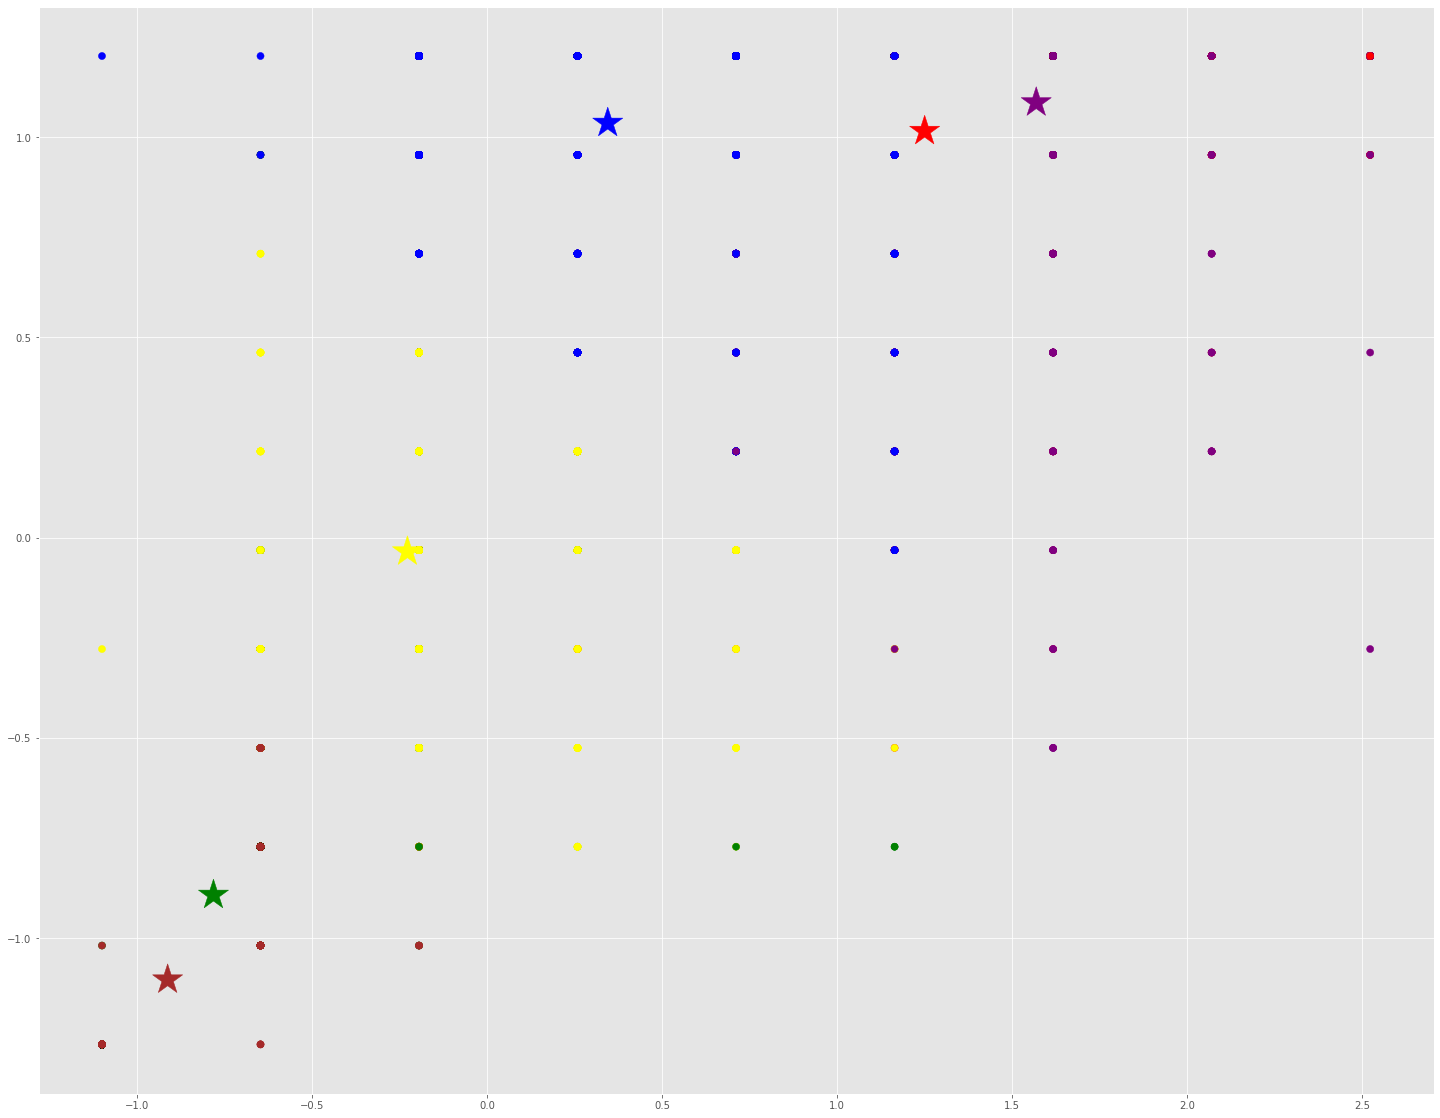

In [147]:
f1 = X['PURCHASES_TRX_RANGE'].values
f2 = X['PURCHASES_FREQUENCY_RANGE'].values
 
plt.scatter(f1, f2, c=asignar, s=50)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [148]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_arr)
closest

array([4557,  260, 2147, 2566,  631,  749], dtype=int64)

Al sacar estas filas de la estructura inicial se puede dar con las caracteristicas del usuario mas representativo de cada cluster hallado y realizar politicas de mercadeo para ese grupo en base a ese usuario

## Clasificar nuevas muestras

Se simulan datos nuevos de un usuario para clasificarlo en un cluster y saber que clase de estrategias de mercadeo se usaran en el

In [149]:
#Simulacion de CREDIT_LIMIT, PURCHASES_TRX_RANGE y PURCHASES_FREQUENCY_RANGE para un nuevo usuario
X_new = np.array([[2,0,0]]) 

new_labels = kmeans.predict(X_new)
print('El nuevo usario se ubica en el cluster', new_labels)

El nuevo usario se ubica en el cluster [1]


Se puede ver la nueva muestra que características tiene, según el centroide asociado al cluster de la predicción.

In [150]:
user_centroid = closest[new_labels[0]]

print('Usuario correspondiente al centroide en el que se ubica: ',user_centroid, '\n')

dataframe.iloc[user_centroid]

Usuario correspondiente al centroide en el que se ubica:  260 



BALANCE                                   2224.590946
PURCHASES                                 3183.000000
ONEOFF_PURCHASES                          3183.000000
INSTALLMENTS_PURCHASES                       0.000000
CASH_ADVANCE                                 0.000000
CREDIT_LIMIT                              9000.000000
PAYMENTS                                  3823.346244
MINIMUM_PAYMENTS                           629.080506
TENURE                                      12.000000
BALANCE_FREQUENCY_RANGE                      9.000000
PURCHASES_FREQUENCY_RANGE                    2.000000
ONEOFF_PURCHASES_FREQUENCY_RANGE             2.000000
PURCHASES_INSTALLMENTS_FREQUENCY_RANGE       0.000000
CASH_ADVANCE_FREQUENCY_RANGE                 0.000000
PRC_FULL_PAYMENT_RANGE                       0.000000
PURCHASES_TRX_RANGE                          1.000000
CASH_ADVANCE_TRX_RANGE                       0.000000
Name: 260, dtype: float64

A partir del análisis para los datos del usuario del centroide, el equipo de marketing puede hacer una estrategia de mercado acorde al nuevo cliente.

In [154]:
# características de los centroides

for i in closest:
    print(dataframe.iloc[i], '\n\n' )


BALANCE                                     154.271153
PURCHASES                                  1498.280000
ONEOFF_PURCHASES                            667.000000
INSTALLMENTS_PURCHASES                      831.280000
CASH_ADVANCE                                  0.000000
CREDIT_LIMIT                              12000.000000
PAYMENTS                                   1343.450205
MINIMUM_PAYMENTS                            189.406063
TENURE                                       12.000000
BALANCE_FREQUENCY_RANGE                      10.000000
PURCHASES_FREQUENCY_RANGE                     9.000000
ONEOFF_PURCHASES_FREQUENCY_RANGE              5.000000
PURCHASES_INSTALLMENTS_FREQUENCY_RANGE        6.000000
CASH_ADVANCE_FREQUENCY_RANGE                  0.000000
PRC_FULL_PAYMENT_RANGE                        6.000000
PURCHASES_TRX_RANGE                           5.000000
CASH_ADVANCE_TRX_RANGE                        0.000000
Name: 4557, dtype: float64 


BALANCE                            